In [5]:
# 1 - Imports - Libreries necessary
import requests
import os
import platform
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import zipfile
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

In [ ]:
pip install pandas-profiling[notebook,html]

In [7]:
df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Folders and Zip files
folder_main = os.getcwd()
folder_DataLab = os.path.join(folder_main, "Data_Lab")
file_Sonora_csv = os.path.join(folder_DataLab, "Accidentes_Sonora_1997_2021.csv")
df_Sonora = pd.read_csv(file_Sonora_csv)

### Matriz de correlación

In [13]:
# Correlation matrix 
df_Sonora_Tidy = df_Sonora.copy()
# One Hot Encoding for "Causa Accidente"
label_encoder = LabelEncoder()
df_Sonora_Tidy["Causa_Accidente"] = label_encoder.fit_transform(df_Sonora_Tidy["CAUSAACCI"])
df_Sonora_Tidy["Alcohol"] = label_encoder.fit_transform(df_Sonora_Tidy["ALIENTO"])
df_Sonora_Tidy["Tipo_Accidente"] = label_encoder.fit_transform(df_Sonora_Tidy["TIPACCID"])
df_Sonora_Tidy["Sexo_Fuga"] = label_encoder.fit_transform(df_Sonora_Tidy["SEXO"])
df_Sonora_Tidy["Cinturon"] = label_encoder.fit_transform(df_Sonora_Tidy["CINTURON"])

df_Sonora_Tidy = df_Sonora_Tidy[["ID_MUNICIPIO","ANIO","MES","Causa_Accidente","Alcohol", "ID_EDAD", "Total_Muertos", "Tipo_Accidente", "Sexo_Fuga", "Cinturon"]]

plt.figure(figsize=(9,7))
sn.heatmap(df_Sonora_Tidy.corr(), annot=True, linewidth=.5, fmt=".2f")
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27292\1058217248.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [14]:
profile = ProfileReport(df_Sonora, title="Accidentes Sonora Profiling Report")
profile.to_file("Accidentes_Transito.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5219: RuntimeWarning: invalid value encountered in sqrt
  z = con_minus_dis / np.sqrt(var)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
file_Sonora_Municipios_csv = os.path.join(folder_DataLab, "Accidentes_Resumen_Sonora_1997_2021.csv")
df_Municipio_Deaths = pd.read_csv(file_Sonora_Municipios_csv)
profile = ProfileReport(df_Municipio_Deaths, title="Accidentes Sonora - tidy Profiling Report")
profile.to_file("Accidentes_Transito_Resumen.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Once created the Pandas Profiling file we need to tun this command in order to display the charts on a Jupiter Notebook
%matplotlib inline

Text(0.5, 1.0, 'EDAD conductores en Accidentes de transito - Sonora')

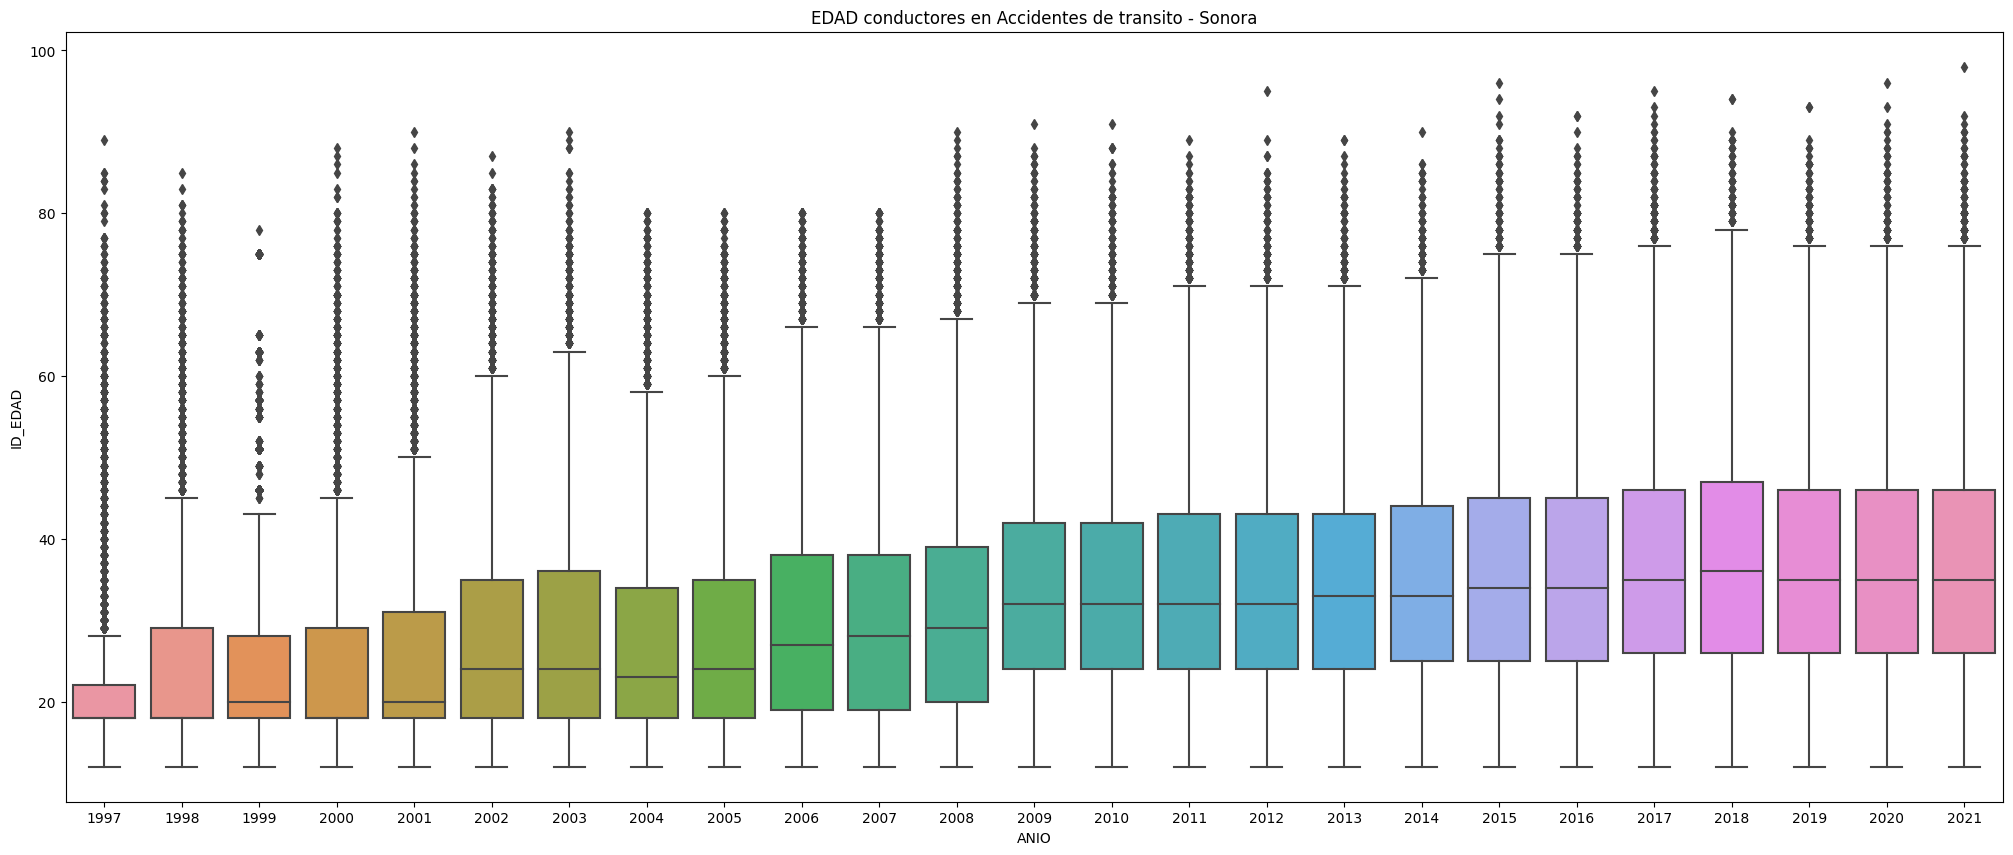

In [20]:
# Removemos los valores de 0 y 99 del año
# 0 = Se fugo, 99 = Se ignora/Desconoce la edad
df_Sonora_Edad_vs_Anio = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99)]
plt.figure(figsize=(25,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("EDAD conductores en Accidentes de transito - Sonora")
# plt.show()

Text(0.5, 1.0, 'EDAD conductores con aliento Alcholico en Accidentes de Transito - Sonora ')

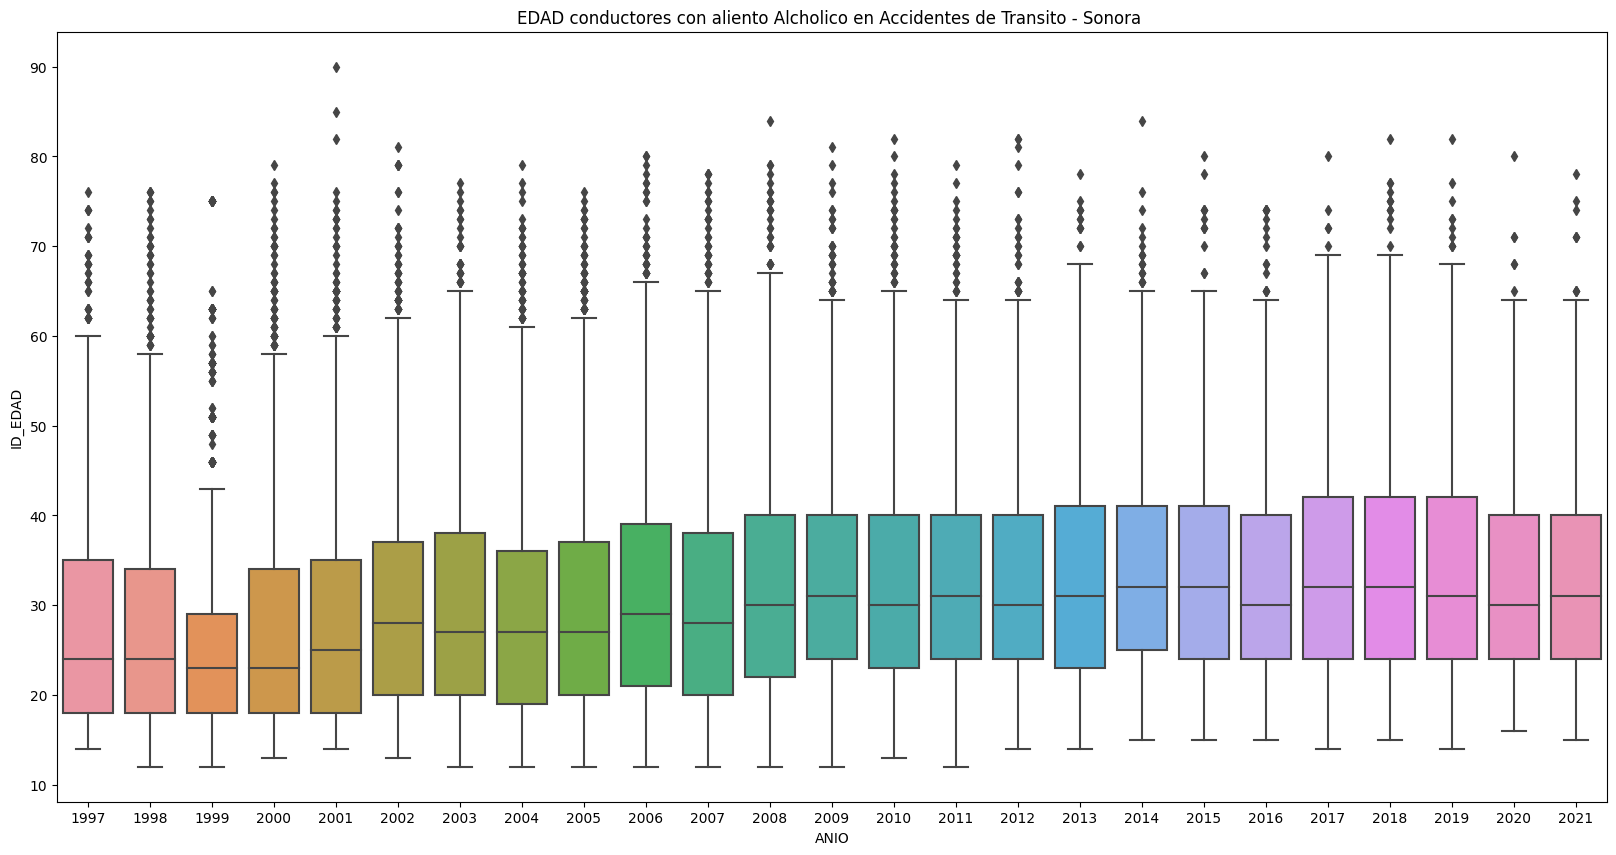

In [21]:
# Removemos los valores de 0 y 99 del año
# 0 = Se fugo, 99 = Se ignora/Desconoce la edad
df_Sonora_Edad_vs_Anio = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99) & (df_Sonora["ALIENTO"] == "Sí")]
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("EDAD conductores con aliento Alcholico en Accidentes de Transito - Sonora ")

Text(0.5, 1.0, 'Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora')

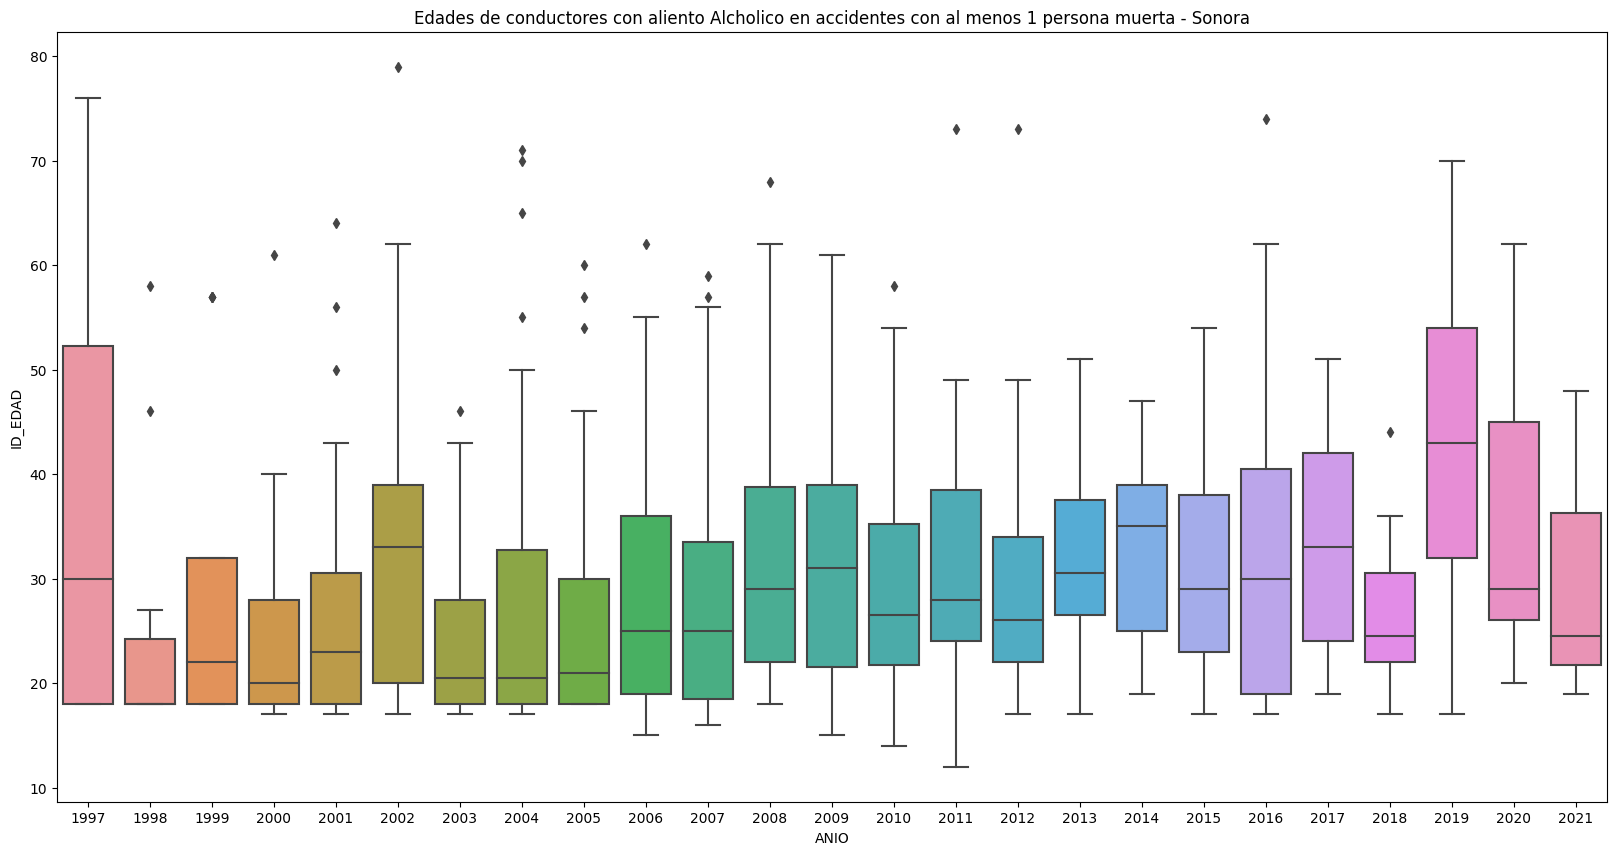

In [22]:
# Remove 0  and 99 from the data
df_Sonora_Edad_vs_Anio = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99) & (df_Sonora["ALIENTO"] == "Sí") & (df_Sonora["Total_Muertos"] >= 1)]
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora")

Text(0.5, 1.0, 'Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora')

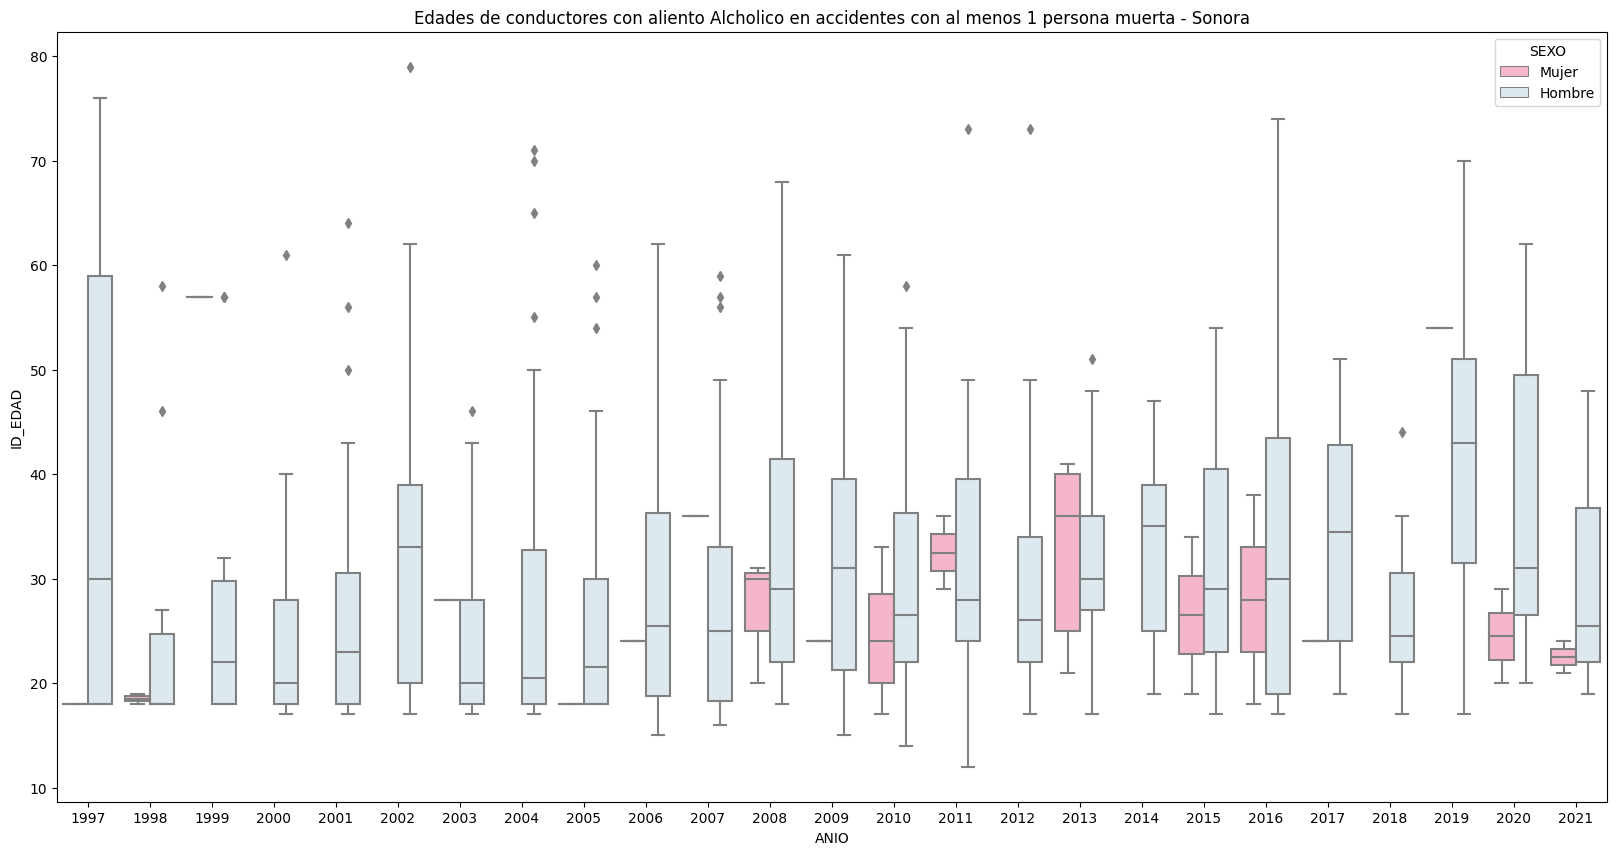

In [23]:
df_Sonora_filtred = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99) & (df_Sonora["ALIENTO"] == "Sí") & (df_Sonora["Total_Muertos"] >= 1)]
# df_Sonora_filtred = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99)]
palette ={"Hombre": "#DAEAF1", "Mujer": "#FFACC7"}
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_filtred, hue="SEXO", palette=palette)
plt.title("Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora")

In [29]:
fig = px.line(df_Municipio_Deaths, x="Año", y="Tasa_Muertos_Alcohol", color="Nombre_Municipio", markers="True",
title="Tasa > 1 de Muertos en accidentes con conductor alcoholizado (por cada 1000 Habitantes) ")
fig.show()